In [1]:
%matplotlib inline
import pandas as pd
import matplotlib  
import matplotlib.pyplot as plt  

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
#I got data from SF OpenData to analyze traffic accidents in SF.
Traffic = pd.DataFrame.from_csv('Traffic_Accidents__Previous_3_Months_.csv', index_col=None)
Traffic.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,100470163,NON-CRIMINAL,TRAFFIC ACCIDENT,Thursday,05/20/2010,22:22,RICHMOND,"ARREST, BOOKED",100 Block of 10TH AV,-122.468975,37.785531,"(37.7855307336245, -122.468975014442)"
1,120477826,NON-CRIMINAL,TRAFFIC ACCIDENT,Monday,06/18/2012,10:24,RICHMOND,NONE,400 Block of 6TH AV,-122.464280,37.780033,"(37.7800332991006, -122.464279879446)"
2,110911630,NON-CRIMINAL,TRAFFIC ACCIDENT,Friday,11/11/2011,22:18,TENDERLOIN,"ARREST, BOOKED",200 Block of GOLDEN GATE AV,-122.414263,37.781757,"(37.7817569847968, -122.414263390372)"
3,140024811,NON-CRIMINAL,TRAFFIC ACCIDENT,Thursday,01/09/2014,09:30,TARAVAL,NONE,LINCOLN WY / FUNSTON AV,-122.470728,37.765738,"(37.7657375793742, -122.470728488949)"
4,60559774,NON-CRIMINAL,TRAFFIC ACCIDENT,Friday,05/26/2006,17:55,INGLESIDE,"ARREST, BOOKED",1300 Block of BOWDOIN ST,-122.407934,37.719443,"(37.7194433534269, -122.407934351403)"


In [4]:
import matplotlib.pyplot as plt

In [5]:
import datetime
import numpy as np

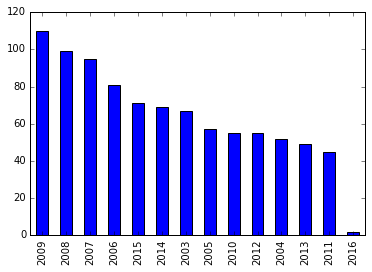

In [6]:
Traffic['Year']=pd.to_datetime(Traffic['Date'], unit='s').dt.strftime('%Y') 
Traffic.Year.value_counts().plot(kind='bar')

In [7]:
NYear=Traffic.Year.value_counts()

In [8]:
Traffic['Month']=pd.to_datetime(Traffic['Date'], unit='s').dt.strftime('%B') 
NMonth=Traffic.Month.value_counts()
NDay=Traffic.DayOfWeek.value_counts()

In [22]:
Traffic['Hour']=pd.to_datetime(Traffic['Time'], unit='s').dt.strftime('%H')

In [23]:
#Convert Hour to numeric (small int being all that's needed)
Traffic.Hour = Traffic.Hour.astype('int8')

In [24]:
#Initialize a new column (of nulls) called TimeOfDay
Traffic['TimeOfDay'] = np.nan

In [25]:
# For assign each incident as 'Morning' if 'Hour' less than 8. This can be done
#by calling the 'TimeOfDay' series, subsetting the dataframe by Hour, and
#assigning that element as 'Morning'
Traffic['TimeOfDay'][Traffic['Hour']<8] = 'Morning'
# Use parentheses and boolean operators (and, or) to subset a dataframe on
#multiple critiera 
Traffic['TimeOfDay'][(Traffic['Hour'] >=8) & (Traffic['Hour']<=18)] = 'DayTime'
Traffic['TimeOfDay'][Traffic['Hour'] > 18] = 'Night'
Traffic.TimeOfDay.value_counts()

/Users/yichenli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yichenli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yichenli/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


DayTime    517
Night      209
Morning    181
Name: TimeOfDay, dtype: int64

In [ ]:
#As we can see, from 8am to 18pm, there are 517 accidents, while 209 for after 18pm and 181 for before 8am. 

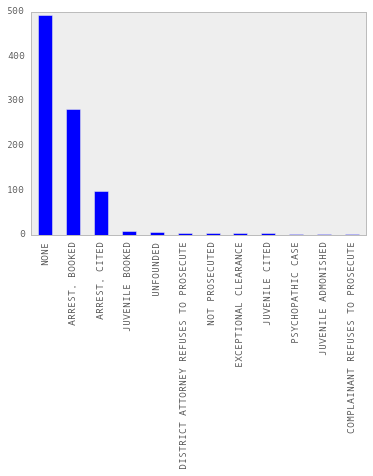

In [137]:
Traffic.Resolution.value_counts().plot(kind='bar')

In [23]:
Traffic.describe()

,IncidntNum,X,Y
count,9.070000e+02,907.000000,907.000000
mean,8.917482e+07,-122.429629,37.760828
std,3.596502e+07,0.030687,0.024703
min,2.092167e+07,-122.510226,37.708311
25%,6.078710e+07,-122.452290,37.741299
50%,9.001177e+07,-122.420875,37.764323
75%,1.203257e+08,-122.406460,37.780809
max,1.600159e+08,-122.365565,37.809671


In [22]:
pd.options.display.mpl_style = 'default' #Better Styling  
new_style = {'grid': False} #Remove grid  
matplotlib.rc('axes', **new_style)  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (17.5, 17) #Size of figure  
rcParams['figure.dpi'] = 250

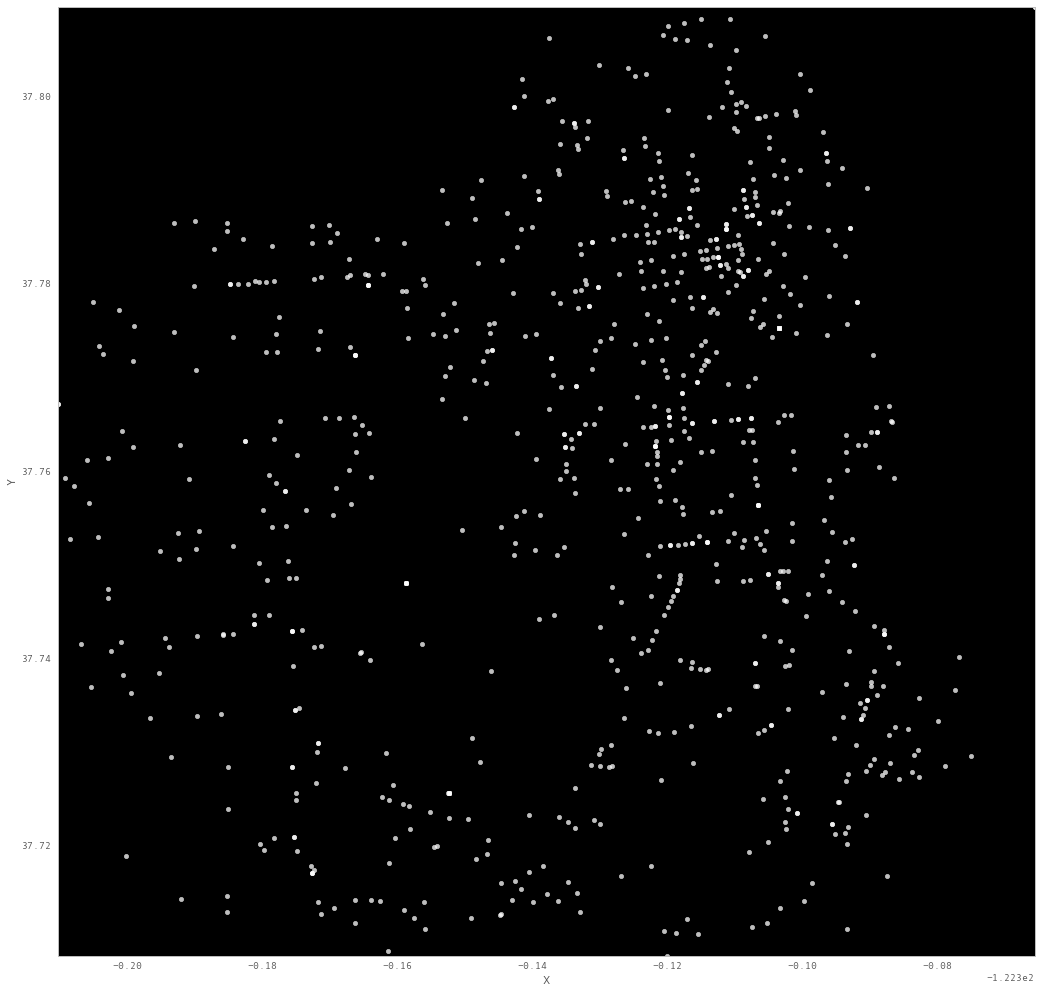

In [28]:
P=Traffic.plot(kind='scatter', x='X', y='Y',color='white',xlim=(-122.510226,-122.365565),ylim=(37.708311,37.809671), alpha=.75)
P.set_axis_bgcolor('black') #Background Color